### Importing Libraries

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [88]:
df = pd.read_csv("customers.csv")

In [89]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Univariate Analysis

In [90]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [91]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

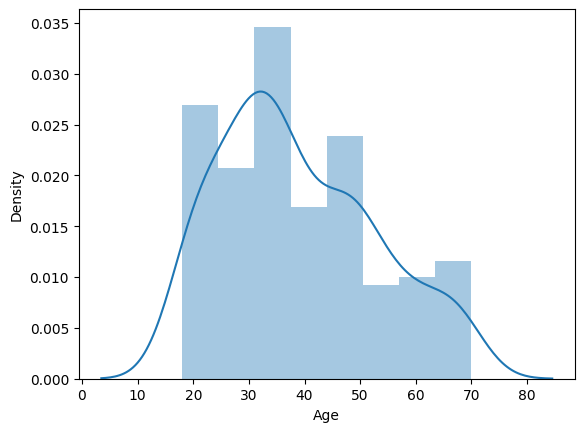

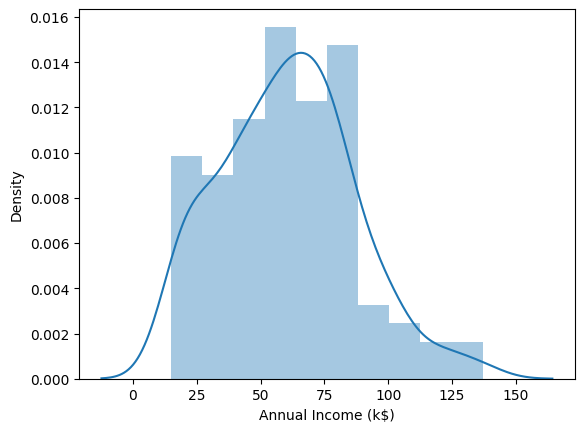

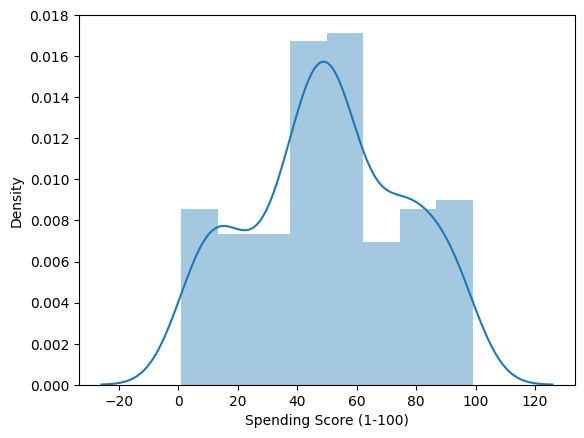

In [92]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

In [97]:
df['Gender'] = df['Gender'].astype('category')

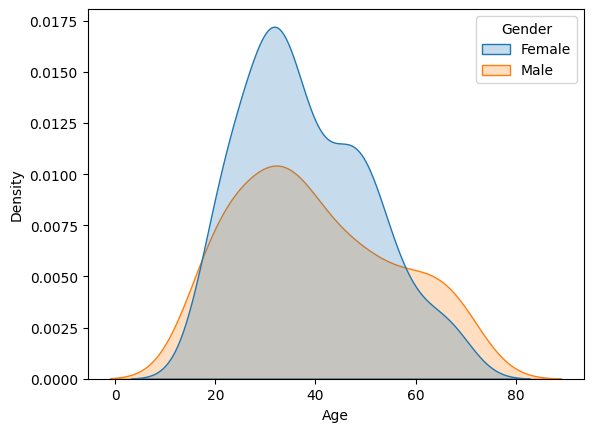

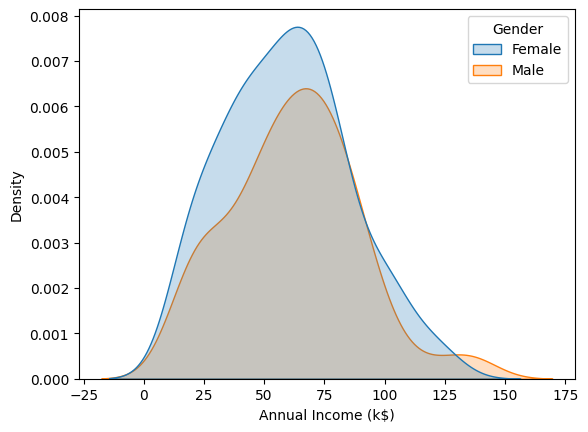

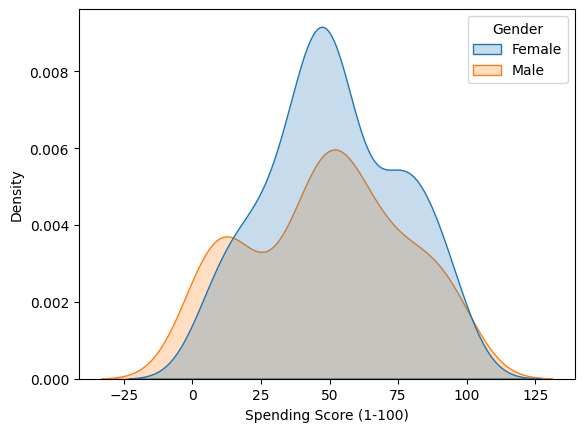

In [98]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(df,x=i,hue='Gender',shade=True)

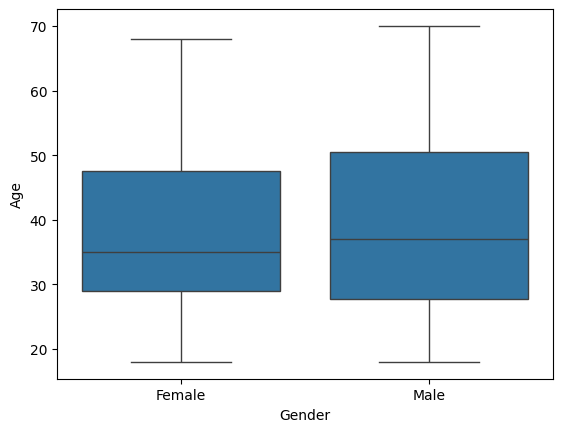

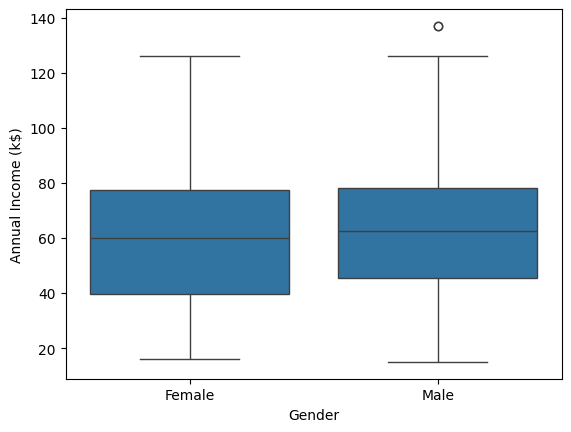

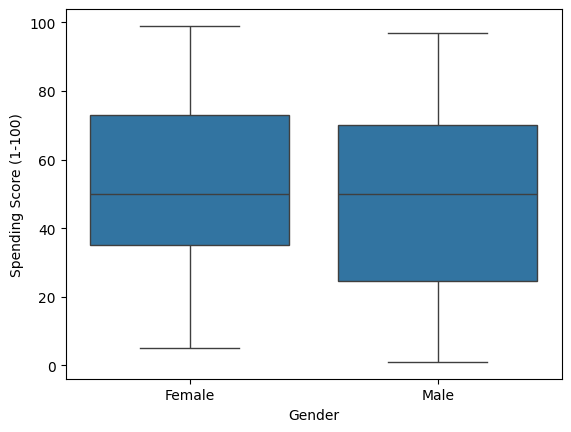

In [99]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [100]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

### Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

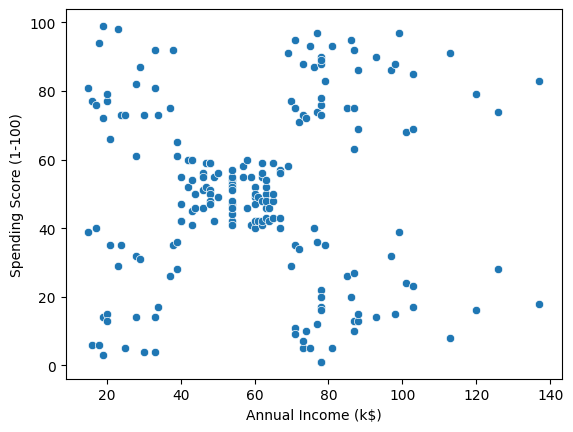

In [101]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' )

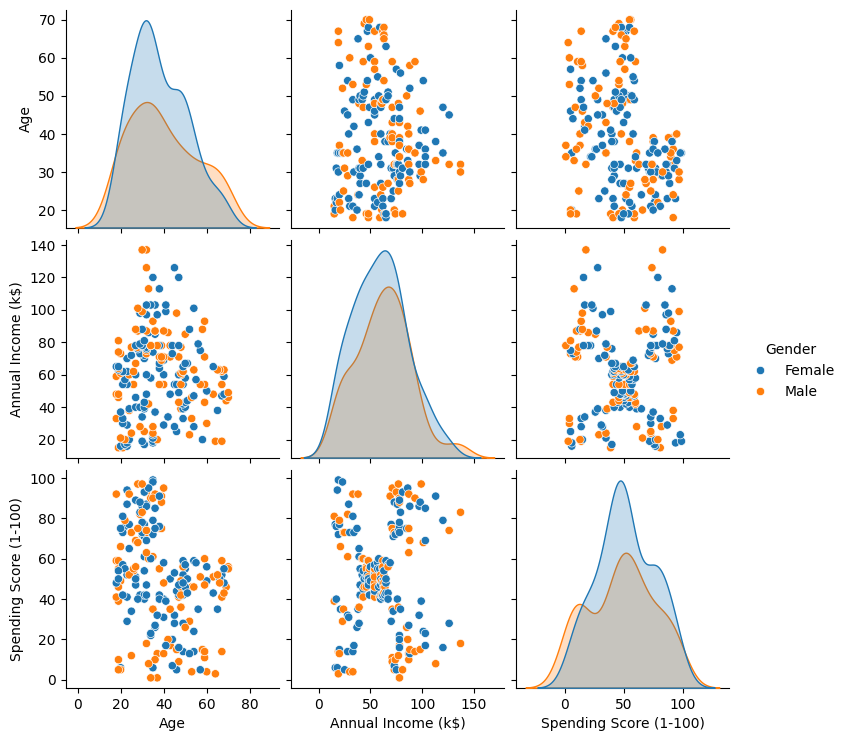

In [102]:
df=df.drop('CustomerID',axis=1)
sns.pairplot(df,hue='Gender')

In [103]:
mean_values = df.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(mean_values)

              Age  Annual Income (k$)  Spending Score (1-100)
Gender                                                       
Female  38.098214           59.250000               51.526786
Male    39.806818           62.227273               48.511364


In [104]:
correlation_matrix = df.drop(columns=['Gender']).corr()
print(correlation_matrix)

                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


<Axes: >

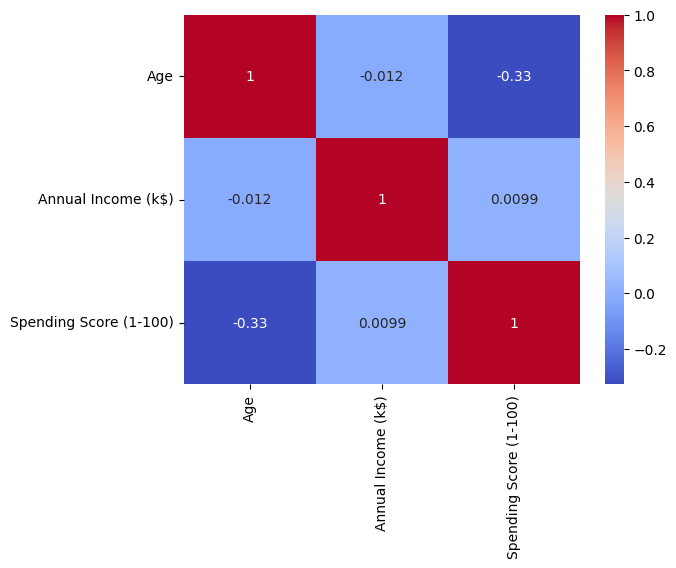

In [105]:
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')

### Clustering - Univariate, Bivariate, Multivariate

In [106]:
clustering1 = KMeans(n_clusters=3)

In [107]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [108]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [109]:
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [110]:
df['Income Cluster'].value_counts()

Income Cluster
0    92
1    86
2    22
Name: count, dtype: int64

In [111]:
clustering1.inertia_

25341.28587186322

In [112]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [113]:
intertia_scores

[137277.28000000003,
 48968.02080832332,
 25640.457784396833,
 15258.880763116054,
 8675.385020242913,
 5430.245925925927,
 3950.2126984127,
 2871.629365079366,
 2455.9369352869353,
 2012.7973970473972]

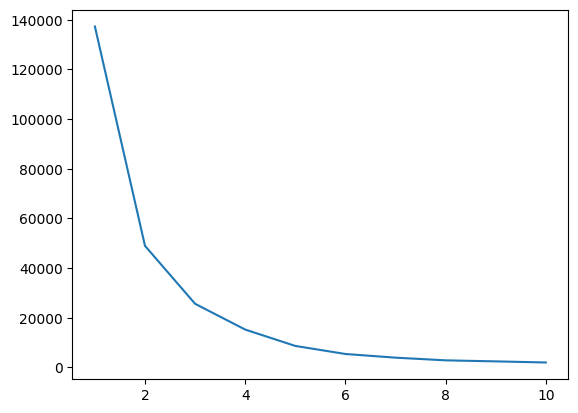

In [114]:
plt.plot(range(1,11),intertia_scores)

In [115]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [116]:
mean_values = df.groupby(['Income Cluster'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(mean_values)

                      Age  Annual Income (k$)  Spending Score (1-100)
Income Cluster                                                       
0               38.065217           71.804348               49.880435
1               40.023256           36.348837               50.081395
2               37.545455          108.181818               52.000000


### Bivariate Clustering

In [117]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,2
2,Female,20,16,6,1,4
3,Female,23,16,77,1,2
4,Female,31,17,40,1,4


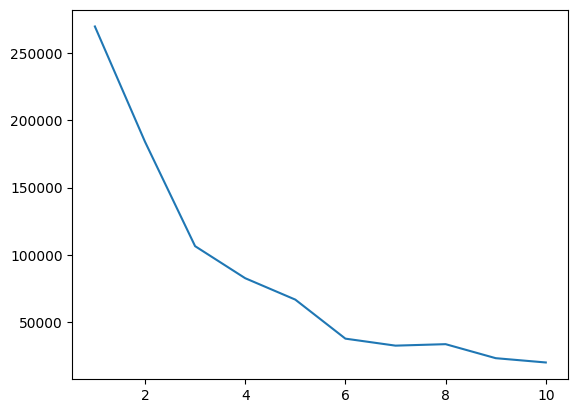

In [118]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [119]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

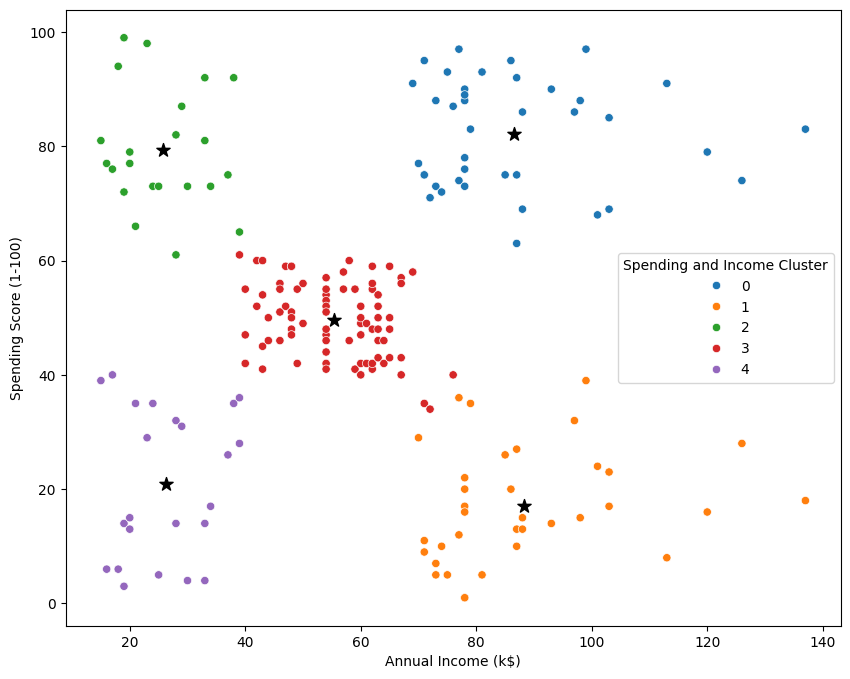

In [120]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')

In [121]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.538462,0.461538
1,0.457143,0.542857
2,0.590909,0.409091
3,0.592593,0.407407
4,0.608696,0.391304


In [122]:
mean_values = df.groupby(['Spending and Income Cluster'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(mean_values)

                                   Age  Annual Income (k$)  \
Spending and Income Cluster                                  
0                            32.692308           86.538462   
1                            41.114286           88.200000   
2                            25.272727           25.727273   
3                            42.716049           55.296296   
4                            45.217391           26.304348   

                             Spending Score (1-100)  
Spending and Income Cluster                          
0                                         82.128205  
1                                         17.114286  
2                                         79.363636  
3                                         49.518519  
4                                         20.913043  


### Mulivariate Clustering

In [123]:
from sklearn.preprocessing import StandardScaler

In [124]:
scale = StandardScaler()

In [125]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,2
2,Female,20,16,6,1,4
3,Female,23,16,77,1,2
4,Female,31,17,40,1,4


In [126]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,1,4,True
1,21,15,81,1,2,True
2,20,16,6,1,4,False
3,23,16,77,1,2,False
4,31,17,40,1,4,False


In [127]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [128]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [129]:
dff = scale.fit_transform(dff)

In [130]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


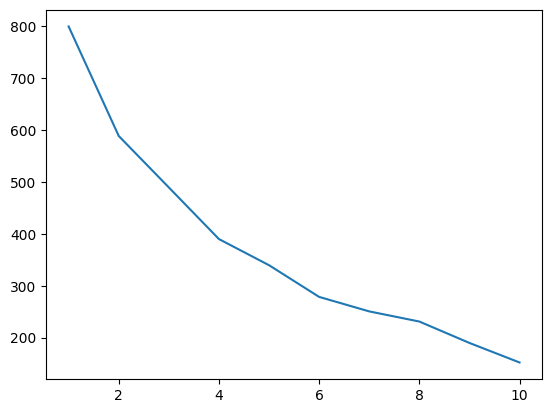

In [131]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [132]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,2
2,Female,20,16,6,1,4
3,Female,23,16,77,1,2
4,Female,31,17,40,1,4
...,...,...,...,...,...,...
195,Female,35,120,79,2,0
196,Female,45,126,28,2,1
197,Male,32,126,74,2,0
198,Male,32,137,18,2,1


In [133]:
df.to_csv('clustering.csv')